# Part A-Baseline Model

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
Concrete_data = pd.read_csv("data/concrete_data.csv")

In [3]:
Concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
Concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
Concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
#Checking null Values
Concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

<Axes: >

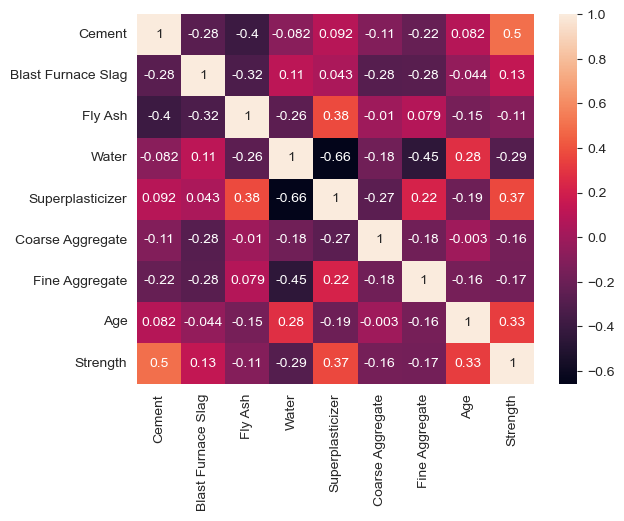

In [7]:
#Corr heatmap to check correlation
sns.heatmap(Concrete_data.corr(), annot=True)

In [8]:
#importing libraries
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
#function to make model with 1 hidden layer having 10 nodes
def build_model():
    model = Sequential()
    model.add(Input(Concrete_data.drop("Strength",axis = 1).shape[1:],))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [14]:
mean_sq_err = []  # list to store Mean Squared errors
model = build_model()
for _ in range(49):
    x_train, x_test, y_train, y_test = train_test_split(Concrete_data.drop('Strength', axis = 1), Concrete_data['Strength'], test_size = 0.3)
    #model with 50 epochs
    model.fit(x_train, y_train, epochs = 50)
    y_pred = model.predict(x_test)
    mean_sq_err.append(mean_squared_error(y_test, y_pred))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 459026.4062   
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308458.2188 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202622.5625 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125844.7031 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68369.3750 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34786.1250 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14479.9736 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5782.9849 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2522.8489 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1614.4548 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1381.7292 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1350.4507
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1334.9896
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1440.7496 
Epoch 15/50
23/23 

In [15]:
#Mean and Standard Deviation of 50 Mean Squared Errors
mse = np.array(mean_sq_err)
print(f"Mean is : {mse.mean()}")
print(f"Standard Deviation is : {mse.std()}")

Mean is : 75.15977962974532
Standard Deviation is : 45.11914203121938


In [16]:
print(mse)

[349.06266975 111.01861837 110.61302034 111.94885945 114.47777608
 106.80224047 109.17438046 105.51731488 112.52168723  84.58419086
  77.60446079  76.51299413  78.52120889  79.21153516  96.86817384
  72.91115457  74.00199279  62.56234607  80.06460857  71.5579213
  75.3885092   69.91282493  80.91712885  65.29405622  63.10790266
  59.26927294  48.93558171  56.65563831  50.90071318  47.97880689
  56.82244803  53.63565925  62.03401854  54.86589482  47.70691617
  45.46334743  58.13646473  52.47269678  44.40643132  48.4044117
  48.61698002  54.72944721  46.27258925  54.01025793  46.51598678
  51.56112202  58.82081168  45.52556727  48.93056204]
